In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/nric.csv')
df.head()

,Date,No of Transactions,Max Price,Min Price,Closing Price,Traded Shares,Total Amount,Prev. Closing,Difference Rs.,% Change
0,2020-11-26,4130,1387,1275,1339,429237,581317178,1274,65,5.10
1,2020-11-25,2808,1274,1150,1274,297132,367384274,1159,115,9.92
2,2020-11-24,2088,1165,1120,1159,224480,258203579,1127,32,2.84
3,2020-11-23,2274,1152,1123,1127,258335,293033741,1138,-11,-0.97
4,2020-11-22,3823,1201,1108,1138,504782,580058318,1110,28,2.52


In [ ]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


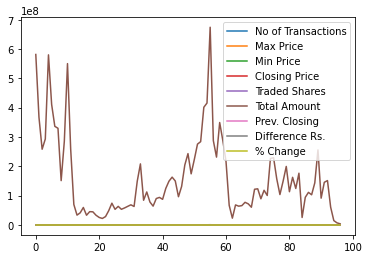

In [ ]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [ ]:
df.columns

Index(['Date', 'No of Transactions', 'Max Price', 'Min Price', 'Closing Price',
       'Traded Shares', 'Total Amount', 'Prev. Closing', 'Difference Rs.',
       '% Change'],
      dtype='object')

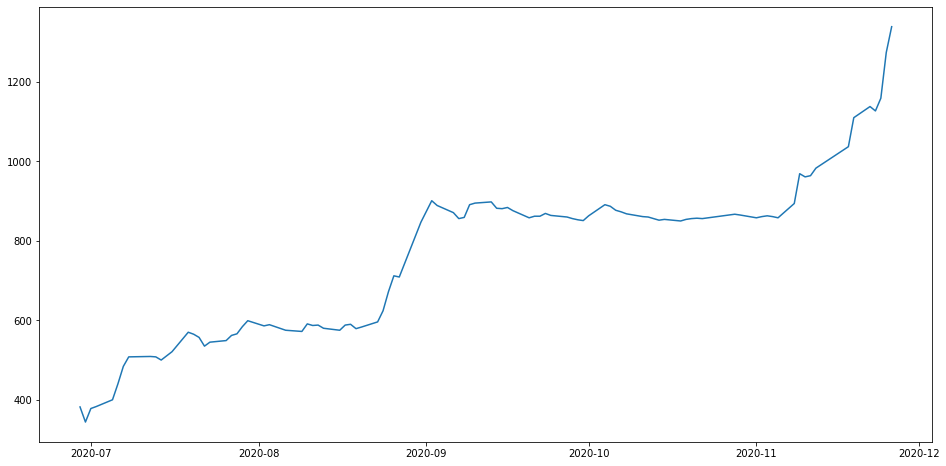

In [ ]:
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Closing Price'],label='Close Price History')

In [ ]:
data_to_use = df.filter(['Date','Closing Price'])

In [ ]:
data_to_use

,ds,y
Date,,
2020-06-29,2020-06-29,382
2020-06-30,2020-06-30,344
2020-07-01,2020-07-01,378
2020-07-02,2020-07-02,383
2020-07-05,2020-07-05,400
...,...,...
2020-11-22,2020-11-22,1138
2020-11-23,2020-11-23,1127
2020-11-24,2020-11-24,1159


In [ ]:
# prepare expected column names prophet needs to use ds as date and y as op
data_to_use.columns = ['ds','y']


In [ ]:
#changing to date time
data_to_use['ds'] = pd.to_datetime(data_to_use['ds'])

In [ ]:
data_to_use.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
model = Prophet()

In [ ]:
model.fit(data_to_use)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
data_to_use=data_to_use.sort_values('ds',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')

In [ ]:
#Create future dates of 365
future_dates = model.make_future_dataframe(periods=35)

In [ ]:
future_dates.tail()

,ds
127,2020-12-27
128,2020-12-28
129,2020-12-29
130,2020-12-30
131,2020-12-31


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-29,228.698239,322.035112,508.889746,228.698239,228.698239,184.401310,184.401310,184.401310,184.401310,184.401310,184.401310,0.0,0.0,0.0,413.099549
1,2020-06-30,233.800770,313.612538,505.188907,233.800770,233.800770,176.882692,176.882692,176.882692,176.882692,176.882692,176.882692,0.0,0.0,0.0,410.683462
2,2020-07-01,238.903300,328.567504,523.587670,238.903300,238.903300,188.495500,188.495500,188.495500,188.495500,188.495500,188.495500,0.0,0.0,0.0,427.398800
3,2020-07-02,244.005830,341.015983,530.627957,244.005830,244.005830,189.394366,189.394366,189.394366,189.394366,189.394366,189.394366,0.0,0.0,0.0,433.400196
4,2020-07-05,259.313421,339.988477,535.420699,259.313421,259.313421,176.190033,176.190033,176.190033,176.190033,176.190033,176.190033,0.0,0.0,0.0,435.503454


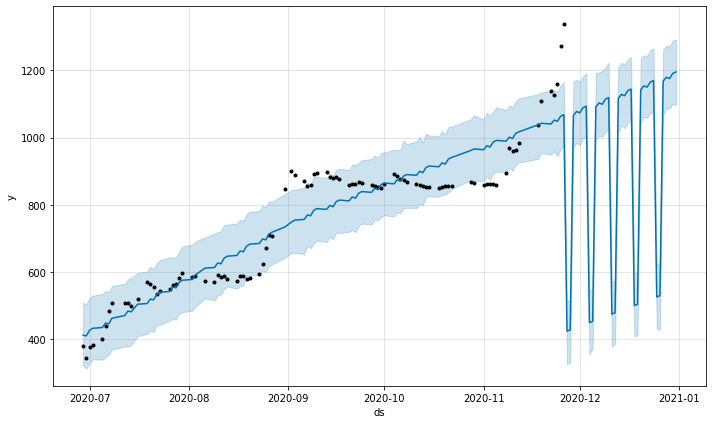

In [ ]:
model.plot(prediction)
plt.show()

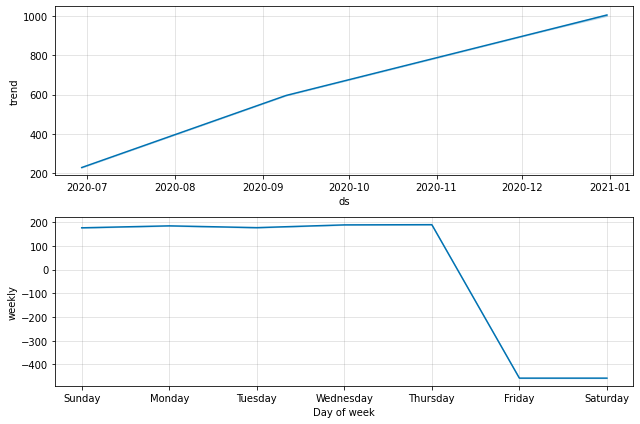

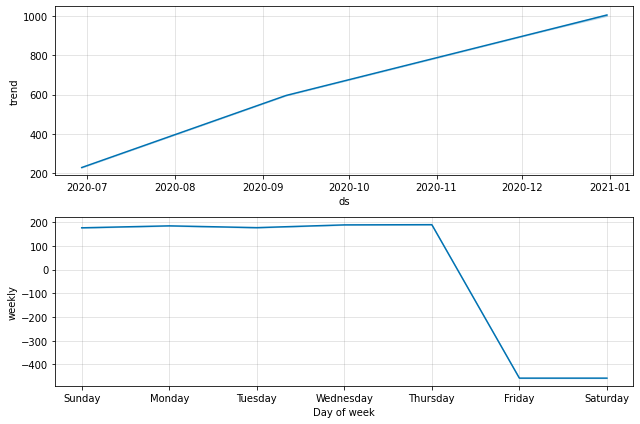

In [ ]:
#Weekly, daywise
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='18 days', horizon = '65 days')
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-07-30 00:00:00 and 2020-09-22 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-08-02,605.722651,579.805925,633.665327,586,2020-07-30
1,2020-08-03,618.079716,590.307712,644.203514,589,2020-07-30
2,2020-08-06,623.350179,594.646302,649.334077,575,2020-07-30
3,2020-08-09,641.809214,615.273904,668.583090,572,2020-07-30
4,2020-08-10,654.166280,626.681576,682.942104,591,2020-07-30


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,6530.091263,80.808980,67.193647,0.082251,0.091676,0.323529
1,8 days,7493.913424,86.567392,73.360009,0.090735,0.108975,0.274510
2,9 days,8947.517751,94.591320,83.086001,0.102434,0.119425,0.196078
3,10 days,9665.873608,98.315175,89.970474,0.113260,0.122044,0.117647
4,11 days,9426.245178,97.088852,89.095206,0.113726,0.122044,0.117647


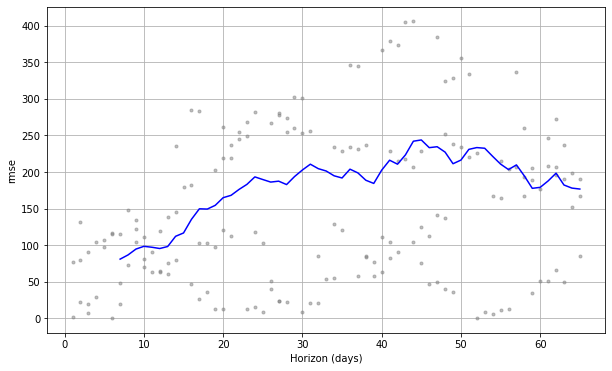

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,6530.091263,80.808980,67.193647,0.082251,0.091676,0.323529
1,8 days,7493.913424,86.567392,73.360009,0.090735,0.108975,0.274510
2,9 days,8947.517751,94.591320,83.086001,0.102434,0.119425,0.196078
3,10 days,9665.873608,98.315175,89.970474,0.113260,0.122044,0.117647
4,11 days,9426.245178,97.088852,89.095206,0.113726,0.122044,0.117647
5,12 days,9088.249050,95.332309,88.558291,0.115027,0.122044,0.137255
6,13 days,9615.622903,98.059283,92.988259,0.120826,0.122044,0.137255
7,14 days,12553.114959,112.040684,103.410167,0.133379,0.134430,0.117647
8,15 days,13595.471719,116.599621,106.920881,0.136916,0.134430,0.117647
9,16 days,18286.577334,135.227872,117.915571,0.146685,0.134430,0.176471
